# 改动代码，学习CNN来解决验证码问题


In [1]:
# run once
# !pip install captcha
# !pip install tqdm
!cat /proc/meminfo


MemTotal:       13335192 kB
MemFree:         2037644 kB
MemAvailable:   12258736 kB
Buffers:          153392 kB
Cached:         10241008 kB
SwapCached:            0 kB
Active:          1879908 kB
Inactive:        8941028 kB
Active(anon):     562476 kB
Inactive(anon):    74312 kB
Active(file):    1317432 kB
Inactive(file):  8866716 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1104 kB
Writeback:             0 kB
AnonPages:        425908 kB
Mapped:           238184 kB
Shmem:            254956 kB
Slab:             397056 kB
SReclaimable:     363084 kB
SUnreclaim:        33972 kB
KernelStack:        3728 kB
PageTables:         6024 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667596 kB
Committed_AS:    2099032 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:      2048 kB
ShmemHugePages:  

In [0]:
# !kill -9 -1

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ
('width and height', 170, 80)
('classes', 36)


Text(0.5,1,u'FM90')

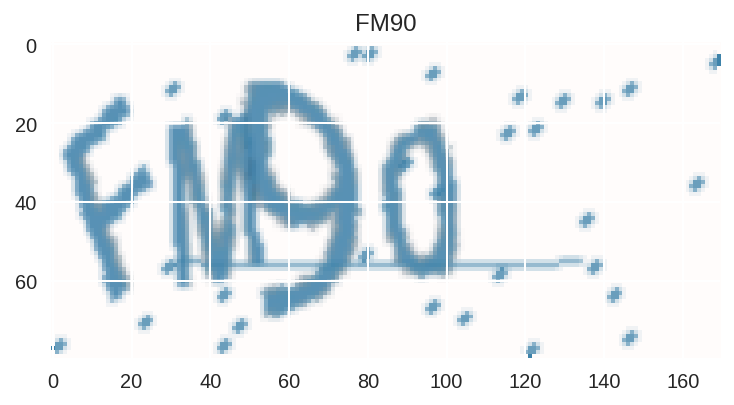

In [3]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import string
# characters = "0123456789ABCDEFGHJKLMNPQRTUVWXY"
characters = string.digits + string.ascii_uppercase
print(characters)

height, n_len, n_class = 80, 4, len(characters)
width = int(height * 0.4 * n_len)
width = 170
print("width and height", width, height)
print("classes", n_class)

generator = ImageCaptcha(width=width, height=height)
random_str = ''.join([random.choice(characters) for j in range(n_len)])
img = generator.generate_image(random_str)
plt.imshow(img)
plt.title(random_str)

In [0]:
cnt = 10
_, axs = plt.subplots(1, cnt, figsize=(15,15))

for i in range(0,cnt):
  random_str = ''.join([random.choice(characters) for j in range(n_len)])
  img = generator.generate_image(random_str)
  axs[i].imshow(img)
#   axs[i].title(random_str)

In [0]:
def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    generator = ImageCaptcha(width=width, height=height)
    while True:
        for i in range(batch_size):
            random_str = ''.join([random.choice(characters) for j in range(n_len)])
            X[i] = generator.generate_image(random_str)
            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

('X0,y shape', (80, 170, 3), (1, 36))
('X0 avarage', 9451446)


Text(0.5,1,u'51CU')

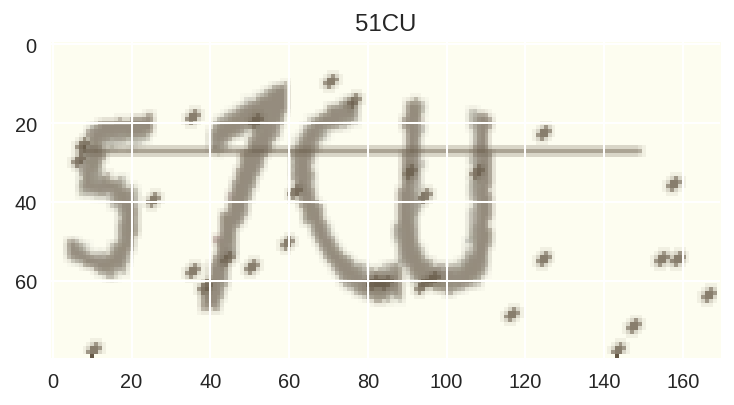

In [3]:
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([characters[x] for x in y])

X, y = next(gen(1))
print ("X0,y shape", X[0].shape, y[0].shape)
print ("X0 avarage", np.sum(X[0]))
plt.imshow(X[0])
plt.title(decode(y))

In [4]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *

def build_model():
  input_tensor = Input((height, width, 3))
  x = input_tensor
  
  for i in range(1):
#     x = Convolution2D(32*2**i, (3, 3), activation='relu', padding="same")(x)
    x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
  
  x = Flatten()(x)
  x = Dense(n_class * 8, activation='relu', name='fc')(x)
  x = Dropout(0.25)(x)
  x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(n_len)]
  model = Model(input=input_tensor, output=x)

  model.compile(loss='categorical_crossentropy',
                optimizer = Adam(lr=0.1),
                metrics=['accuracy'])
  return model

def build_model_other():
  input_tensor = Input((height, width, 3))
  x = input_tensor
  for i in range(4):
      x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
      x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
      x = MaxPooling2D((2, 2))(x)

  x = Flatten()(x)
  x = Dropout(0.25)(x)
  x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]
  model = Model(input=input_tensor, output=x)

  model.compile(loss='categorical_crossentropy',
                optimizer='adadelta',
                metrics=['accuracy'])
  return model

model = build_model_other()

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activati

In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 80, 170, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 78, 168, 32)  896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 76, 166, 32)  9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 38, 83, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [0]:
model.load_weights("./captcha-v1.h5")

In [8]:
model.fit_generator(gen(), samples_per_epoch=51200, nb_epoch=5, 
                    nb_worker=2, pickle_safe=True, 
                    validation_data=gen(), nb_val_samples=1280)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., use_multiprocessing=True, workers=2, validation_data=<generator..., steps_per_epoch=51200, epochs=5, validation_steps=1280)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5


ResourceExhaustedError: ignored

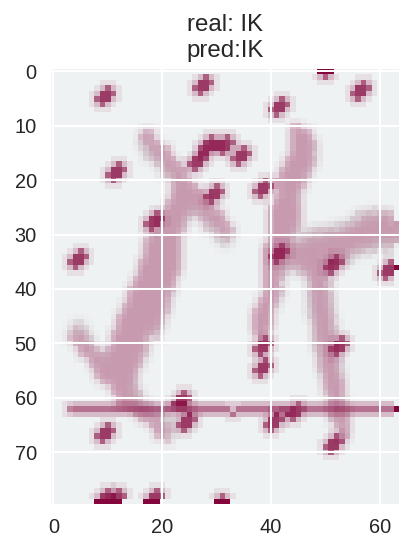

In [23]:
# 手动测试模型
X, y = next(gen(1))
y_pred = model.predict(X)
plt.title('real: %s\npred:%s'%(decode(y), decode(y_pred)))
plt.imshow(X[0], cmap='gray')

In [24]:
from tqdm import tqdm
def evaluate(model, batch_num=32):
    batch_acc = 0
    generator = gen()
    for i in tqdm(range(batch_num)):
        X, y = next(generator)
        y_pred = model.predict(X)
        y_pred = np.argmax(y_pred, axis=2).T
        y_true = np.argmax(y, axis=2).T
        batch_acc += np.mean(map(np.array_equal, y_true, y_pred))
    return batch_acc / batch_num

evaluate(model)

100%|██████████| 32/32 [00:02<00:00, 14.35it/s]


0.947265625